<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [23]:
# импортирую библиотеки

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# загружу данные
data = pd.read_csv('/datasets/insurance.csv')

In [27]:
# функция для просмотра данных
def data_check(dataset):
    print('Основная информация о таблице\n')
    display(dataset.info())
    print('Информация о таблице по столбцам\n')
    display(dataset.head())
    print('Основные значения данных\n')
    display(dataset.describe)
    print('Количество дубликатов\n')
    display(dataset.duplicated().sum())
    print('Количество уникальных значений\n')
    display(dataset.nunique())
    print('Количество пропусков в каждом столбце\n')
    display(dataset.isna().sum())

In [28]:
data_check(data)

Основная информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Информация о таблице по столбцам



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Основные значения данных



<bound method NDFrame.describe of       Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0       1     41.0   49600.0            1                  0
1       0     46.0   38000.0            1                  1
2       0     29.0   21000.0            0                  0
3       0     21.0   41700.0            2                  0
4       1     28.0   26100.0            0                  0
...   ...      ...       ...          ...                ...
4995    0     28.0   35700.0            2                  0
4996    0     34.0   52400.0            1                  0
4997    0     20.0   33900.0            2                  0
4998    1     22.0   32700.0            3                  0
4999    1     28.0   40600.0            1                  0

[5000 rows x 5 columns]>

Количество дубликатов



153

Количество уникальных значений



Пол                    2
Возраст               46
Зарплата             524
Члены семьи            7
Страховые выплаты      6
dtype: int64

Количество пропусков в каждом столбце



Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

В датасете имеется 5 столбцов по 5000 строк в каждом. Преобразую тип данных столбцов "возраст" и "зарплата" в int

In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Визуализирую распределения по признакам.

In [6]:
def feature_plot(title, x_name):
    sns.set()
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.countplot(x=x_name, data=data, palette='coolwarm')
    ax.set_title(title)
    plt.ylabel('Количество')

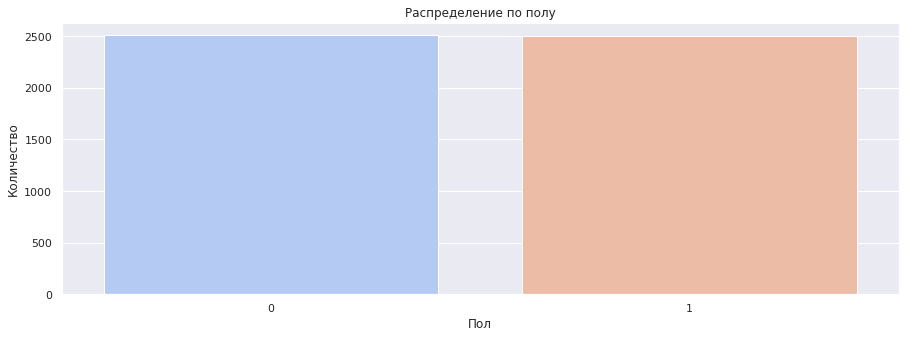

In [7]:
feature_plot('Распределение по полу', 'Пол')

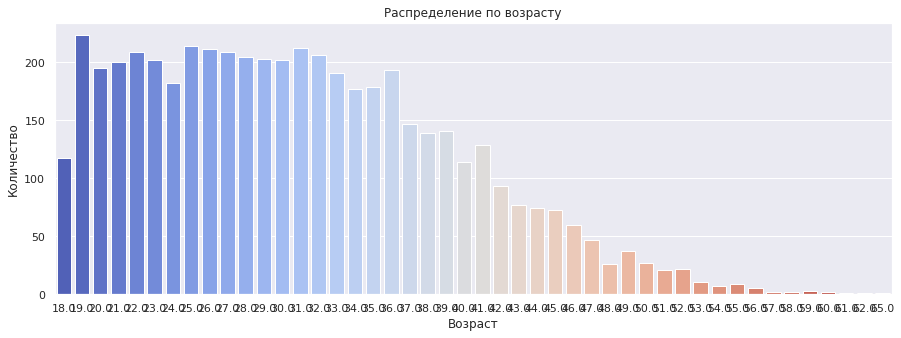

In [8]:
feature_plot('Распределение по возрасту', 'Возраст')

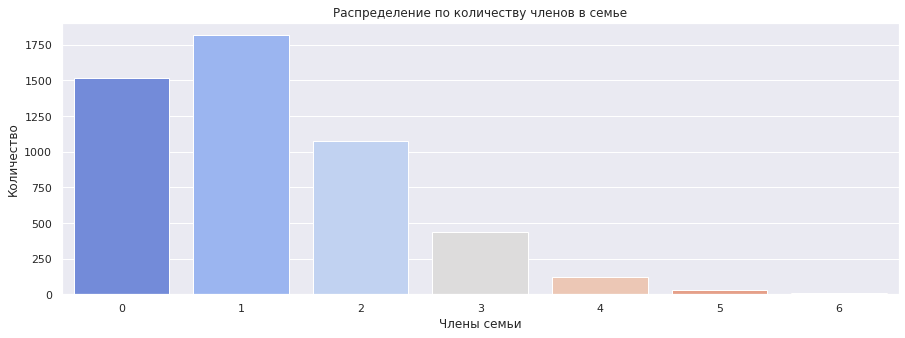

In [9]:
feature_plot('Распределение по количеству членов в семье', 'Члены семьи')

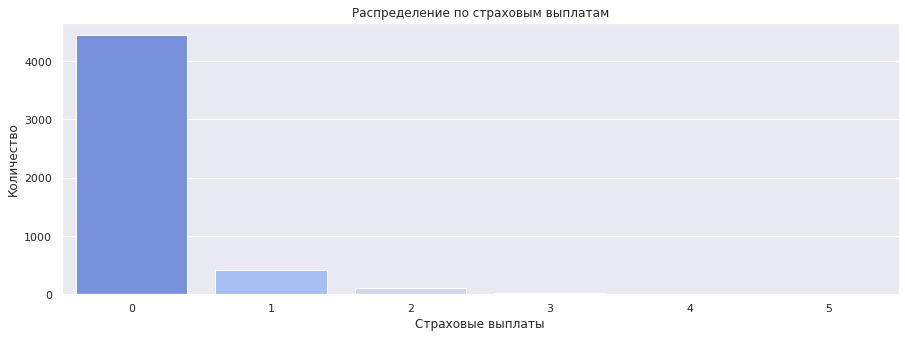

In [10]:
feature_plot('Распределение по страховым выплатам', 'Страховые выплаты')

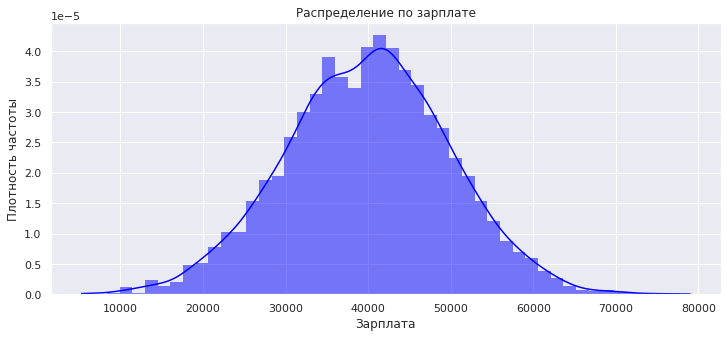

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data['Зарплата'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
ax.set_title('Распределение по зарплате')
plt.ylabel('Плотность частоты');

In [12]:
corr = data.corr()

In [13]:
corr

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


<AxesSubplot:>

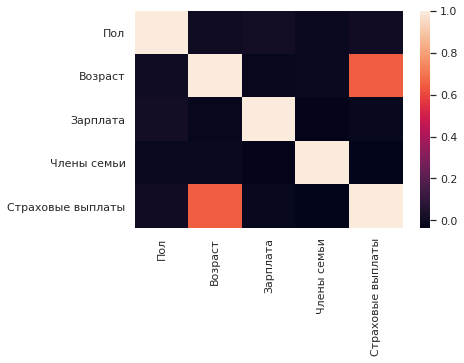

In [14]:
sns.heatmap(corr)

In [15]:
data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')

Количество данных/признаков мало, поэтому дубликаты удалять не буду.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


### Вывод

Данные загружены корректно, аномалий, пропусков и артефактов нет. Имеется некая корреляция между страховыми выплатами и возрастом - 0.65103.
- Целевой признак: Страховые выплаты. 
- Остальные признаки: Пол, Возраст, Зарплата, Члены семьи. 
- Среднее по данным: возраст около 30 лет, 1 член семьи, зарплата ~40000₽.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос задания**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
<br>a. Изменится. Приведите примеры матриц.
<br>b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Обоснование:**

Заменю матрицу $X$ на матрицу $Z$:
$$
Z=XP$$

здесь $P$  - обратимая матрица с некими значениями, на которую может быть умножена матрица $X$.

Заменю $X$ на $Z$ и вычислю, чему будет равно предсказание и вектор весов.


$$a_1 = Zw_1$$
$$w_1 = {(Z^TZ)}^{-1}Z^Ty $$

Теперь подставлю в предсказание правую часть уравнения вектора весов

$$a_1 = Z(Z^TZ)^{-1}Z^Ty$$

Заменю Z согласно формуле $ Z = XP $

$$a_1 = XP((XP)^T(XP))^{-1}(XP)^Ty$$

Из теории мне известно следующее свойство обратной матрицы:
    $$(AB)^{-1} = A^{-1}B^{-1} $$

$((XP)^T(XP))^{-1}$ буду раскрывать в два шага

$$a_1 = XP((XP)^T(XP))^{-1}(XP)^Ty = XP(XP)^{-1}((XP)^T)^{-1}(XP)^Ty = XPP^{-1}X^{-1}((XP)^{T})^{-1}(XP)^{T}y$$

Присвою $PP^{-1} = E$ - единичная матрица. Для следующего шага воспользуюсь свойством транспонированной матрицы:
    $$ (AB)^{T} = A^{T}B^{T}$$

Умножение на единичную матрицу ничего не изменяет. $((XP)^{T})^{-1}(XP)^{T}$ раскрою скобки в 3 шага:


$$a_1 = XEX^{-1}((XP)^{T})^{-1}(XP)^{T}y = XX^{-1}(P^{T}X^{T})^{-1}P^{T}X^{T}y = XX^{-1}(X^{T})^{-1}(P^{T})^{-1}P^{T}X^{T}y$$

$(P^{T})^{-1}P^{T} = E$ снова единичная матрица.

И что же тогда получается

$$a_1 = XX^{-1}(X^{T})^{-1}EX^{T}y = X(X^{T}X)^{-1}X^{T}y = Xw = a$$

Получается, что значение предсказания $a$ не меняется, если умножать матрицу признаков на обратимую матрицу.

**Ответ:** не меняется

Найду связь между параметрами линейной регрессии в исходной задаче и в преобразованной.

Подставлю значение новой матрицы $Z$ в формулу $w_1$

$$w_1 = ((XP)^{T}XP)^{-1}(XP)^{T}y = (P^{T}X^{T}XP)^{-1}P^{T}X^{T}y = (P^{T}(X^{T}X)P)^{-1}P^{T}X^{T}y$$

Раскрою скобки $(P^{T}(X^{T}X)P)^{-1}$

$$w_1 = P^{-1}(X^{T}X)^{-1}(P^{T})^{-1}P^{T}X^{T}y$$

Так как  по условию обратимая, то произведение  равно (единичная матрица) (о чём я уже указывал выше):
$$w_1 = P^{-1}(X^{T}X)^{-1}EX^{T}y = P^{-1}(X^{T}X)^{-1}X^{T}y$$

Как видно что $(X^{T}X)^{-1}X^{T}y$ равно $w$ из условия.

В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w_1$ связаны следующим образом:
$$w_1 = P^{-1}w$$

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования буду использовать матрицу со случайными величинами, у которой существует обратная к ней матрица.

**Обоснование**

In [17]:
# целевой признак это Страховые выплаты
target = data.loc[:, 'Страховые выплаты']
features = data.drop(['Страховые выплаты'], axis=1)

In [18]:
# поделю признаки на test и train
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

In [19]:
# преобразую выборки в матрицы
matrix_train = features_train.values
matrix_test = features_test.values

In [20]:
matrix_train.shape

(4000, 4)

In [21]:
matrix_test.shape

(1000, 4)

Так как признаков у основной матрицы 4, то сделаю рандомную обратимую матрицу 4 на 4.

In [22]:
random_matrix = np.random.randn(4, 4)
random_matrix

array([[ 0.5335267 , -2.56020938, -0.34986738,  0.52704177],
       [ 1.7569955 ,  1.42809121, -0.43566738, -0.96086505],
       [-0.18660931,  0.15617823,  1.11077756,  1.02672121],
       [-0.77100498,  1.46437103,  1.36142852,  0.57970731]])

Необходимо проверить получившуюся матрицу на обратимость. Для этого умножу её на обратную ей матрицу. Согласно свойству матриц должна получиться единичная матрица - матрица, в которой по главной диаганали единицы, а остальное - нули.

In [23]:
np.round(random_matrix @ np.linalg.inv(random_matrix))

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1., -0., -0.],
       [-0., -0.,  1., -0.],
       [-0., -0.,  0.,  1.]])

Полученная матрица является единичной, это значит, что рандомная матрица обратима.

Теперь перемножу тестовую и тренировочную матрицы на получившуюся рандомную обратимую матрицу

In [24]:
new_matrix_train = matrix_train @ random_matrix
new_matrix_test = matrix_test @ random_matrix

In [25]:
new_matrix_train

array([[-7393.45282184,  6247.38404463, 44202.95641878, 40845.44614668],
       [-6311.22521341,  5395.85883995, 37970.81600786, 35075.95771435],
       [-9400.92586357,  7997.0222535 , 56408.90660437, 52115.30513031],
       ...,
       [-8269.63702638,  7038.62269725, 49634.90615461, 45856.14922866],
       [-9313.55678138,  7861.80471855, 55645.81681456, 51419.91226188],
       [-7580.277122  ,  6399.20543948, 45311.44678966, 41871.96880398]])

In [26]:
new_matrix_test

array([[-7222.86643866,  6143.93538988, 43311.39355151, 40012.73735012],
       [-7956.55369521,  6805.61493355, 47855.45234728, 44204.80017774],
       [-7787.19579439,  6628.23875075, 46746.39440346, 43188.01611361],
       ...,
       [-3890.25513834,  3332.82323716, 23426.65506927, 21638.98085745],
       [-7173.67557834,  6113.98271619, 43081.61398846, 39800.26995425],
       [-8418.04705675,  7107.7923904 , 50311.79733434, 46491.45191937]])

Проведу проверку - изменились ли данные после этих манипуляций.

In [27]:
# перемножу признаки train на обратную рандомной матрицу

decoded_matrix_train = new_matrix_train @ np.linalg.inv(random_matrix)

In [28]:
# воссоздам датафрейм из матрицы

train_check = pd.DataFrame(decoded_matrix_train, columns=features_train.columns)
train_check = np.round(train_check)

In [29]:
# собственно проверка
train_check, features_train

(      Пол  Возраст  Зарплата  Члены семьи
 0    -0.0     20.0   39800.0          2.0
 1     1.0     40.0   34200.0          0.0
 2     1.0     45.0   50800.0          1.0
 3     0.0     28.0   39100.0          2.0
 4    -0.0     28.0   39000.0          1.0
 ...   ...      ...       ...          ...
 3995  0.0     42.0   32100.0         -0.0
 3996  0.0     28.0   22700.0          4.0
 3997  1.0     41.0   44700.0          1.0
 3998 -0.0     22.0   50100.0          4.0
 3999  0.0     19.0   40800.0          0.0
 
 [4000 rows x 4 columns],
       Пол  Возраст  Зарплата  Члены семьи
 317     0       20     39800            2
 4143    1       40     34200            0
 4252    1       45     50800            1
 710     0       28     39100            2
 148     0       28     39000            1
 ...   ...      ...       ...          ...
 3497    0       42     32100            0
 3492    0       28     22700            4
 2177    1       41     44700            1
 3557    0       22     50

### Вывод:
То, что было в теоретической части доказано провёл отчасти в практической и как видно, данные не изменились, теперь можно приступить к проверке алгоритма.

## Проверка алгоритма

Создам модель для матриц. Используется линейная регрессия.

In [30]:
model = LinearRegression()
model.fit(matrix_train, target_train)
predicted_norm = model.predict(features_test)
norm_r2 = model.score(features_test, target_test)

In [31]:
model.fit(new_matrix_train, target_train)
predicted_encoded = model.predict(new_matrix_test)
encoded_r2 = model.score(new_matrix_test, target_test)

In [32]:
# проверка двух моделей
print('R2 score не шифрованной матрицы: ', norm_r2)
print('R2 score шифрованной матрицы: ', encoded_r2)

R2 score не шифрованной матрицы:  0.41176839389109277
R2 score шифрованной матрицы:  0.41176839389111375


### Вывод

Проверил качество моделей Линейной регрессии с помощью метрики R2 на данных - сначала на исходных (не шифрованных), затем умноженных на обратимую матрицу (шифрованные), размер которой равен числу признаков. Показатели метрики совпали. Могу сделать вывод, что алгоритм работает.

## Вывод

<br>На работу поступили чистые данные.
<br>Предобработка не потребовалась.
<br>Проверил теоретическую возможность, что если признаки умножить на обратимую матрицу, то изменится ли качество линейной регрессии. Теоретически нет.
<br>Затем провел алгоритм такого преобразования и после проверил как это работает на моделях. Согласно проведённой проверки алгоритма с помощью метрики R2 на исходной не шифрованной выборке и на шифрованной матрице выяснилось, что качество линейной матрицы, сами данные тоже не изменяются, зато мы таким образом можем их защитить.